<a href="https://colab.research.google.com/github/Bambaribam/langandcomp/blob/main/pytorch_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

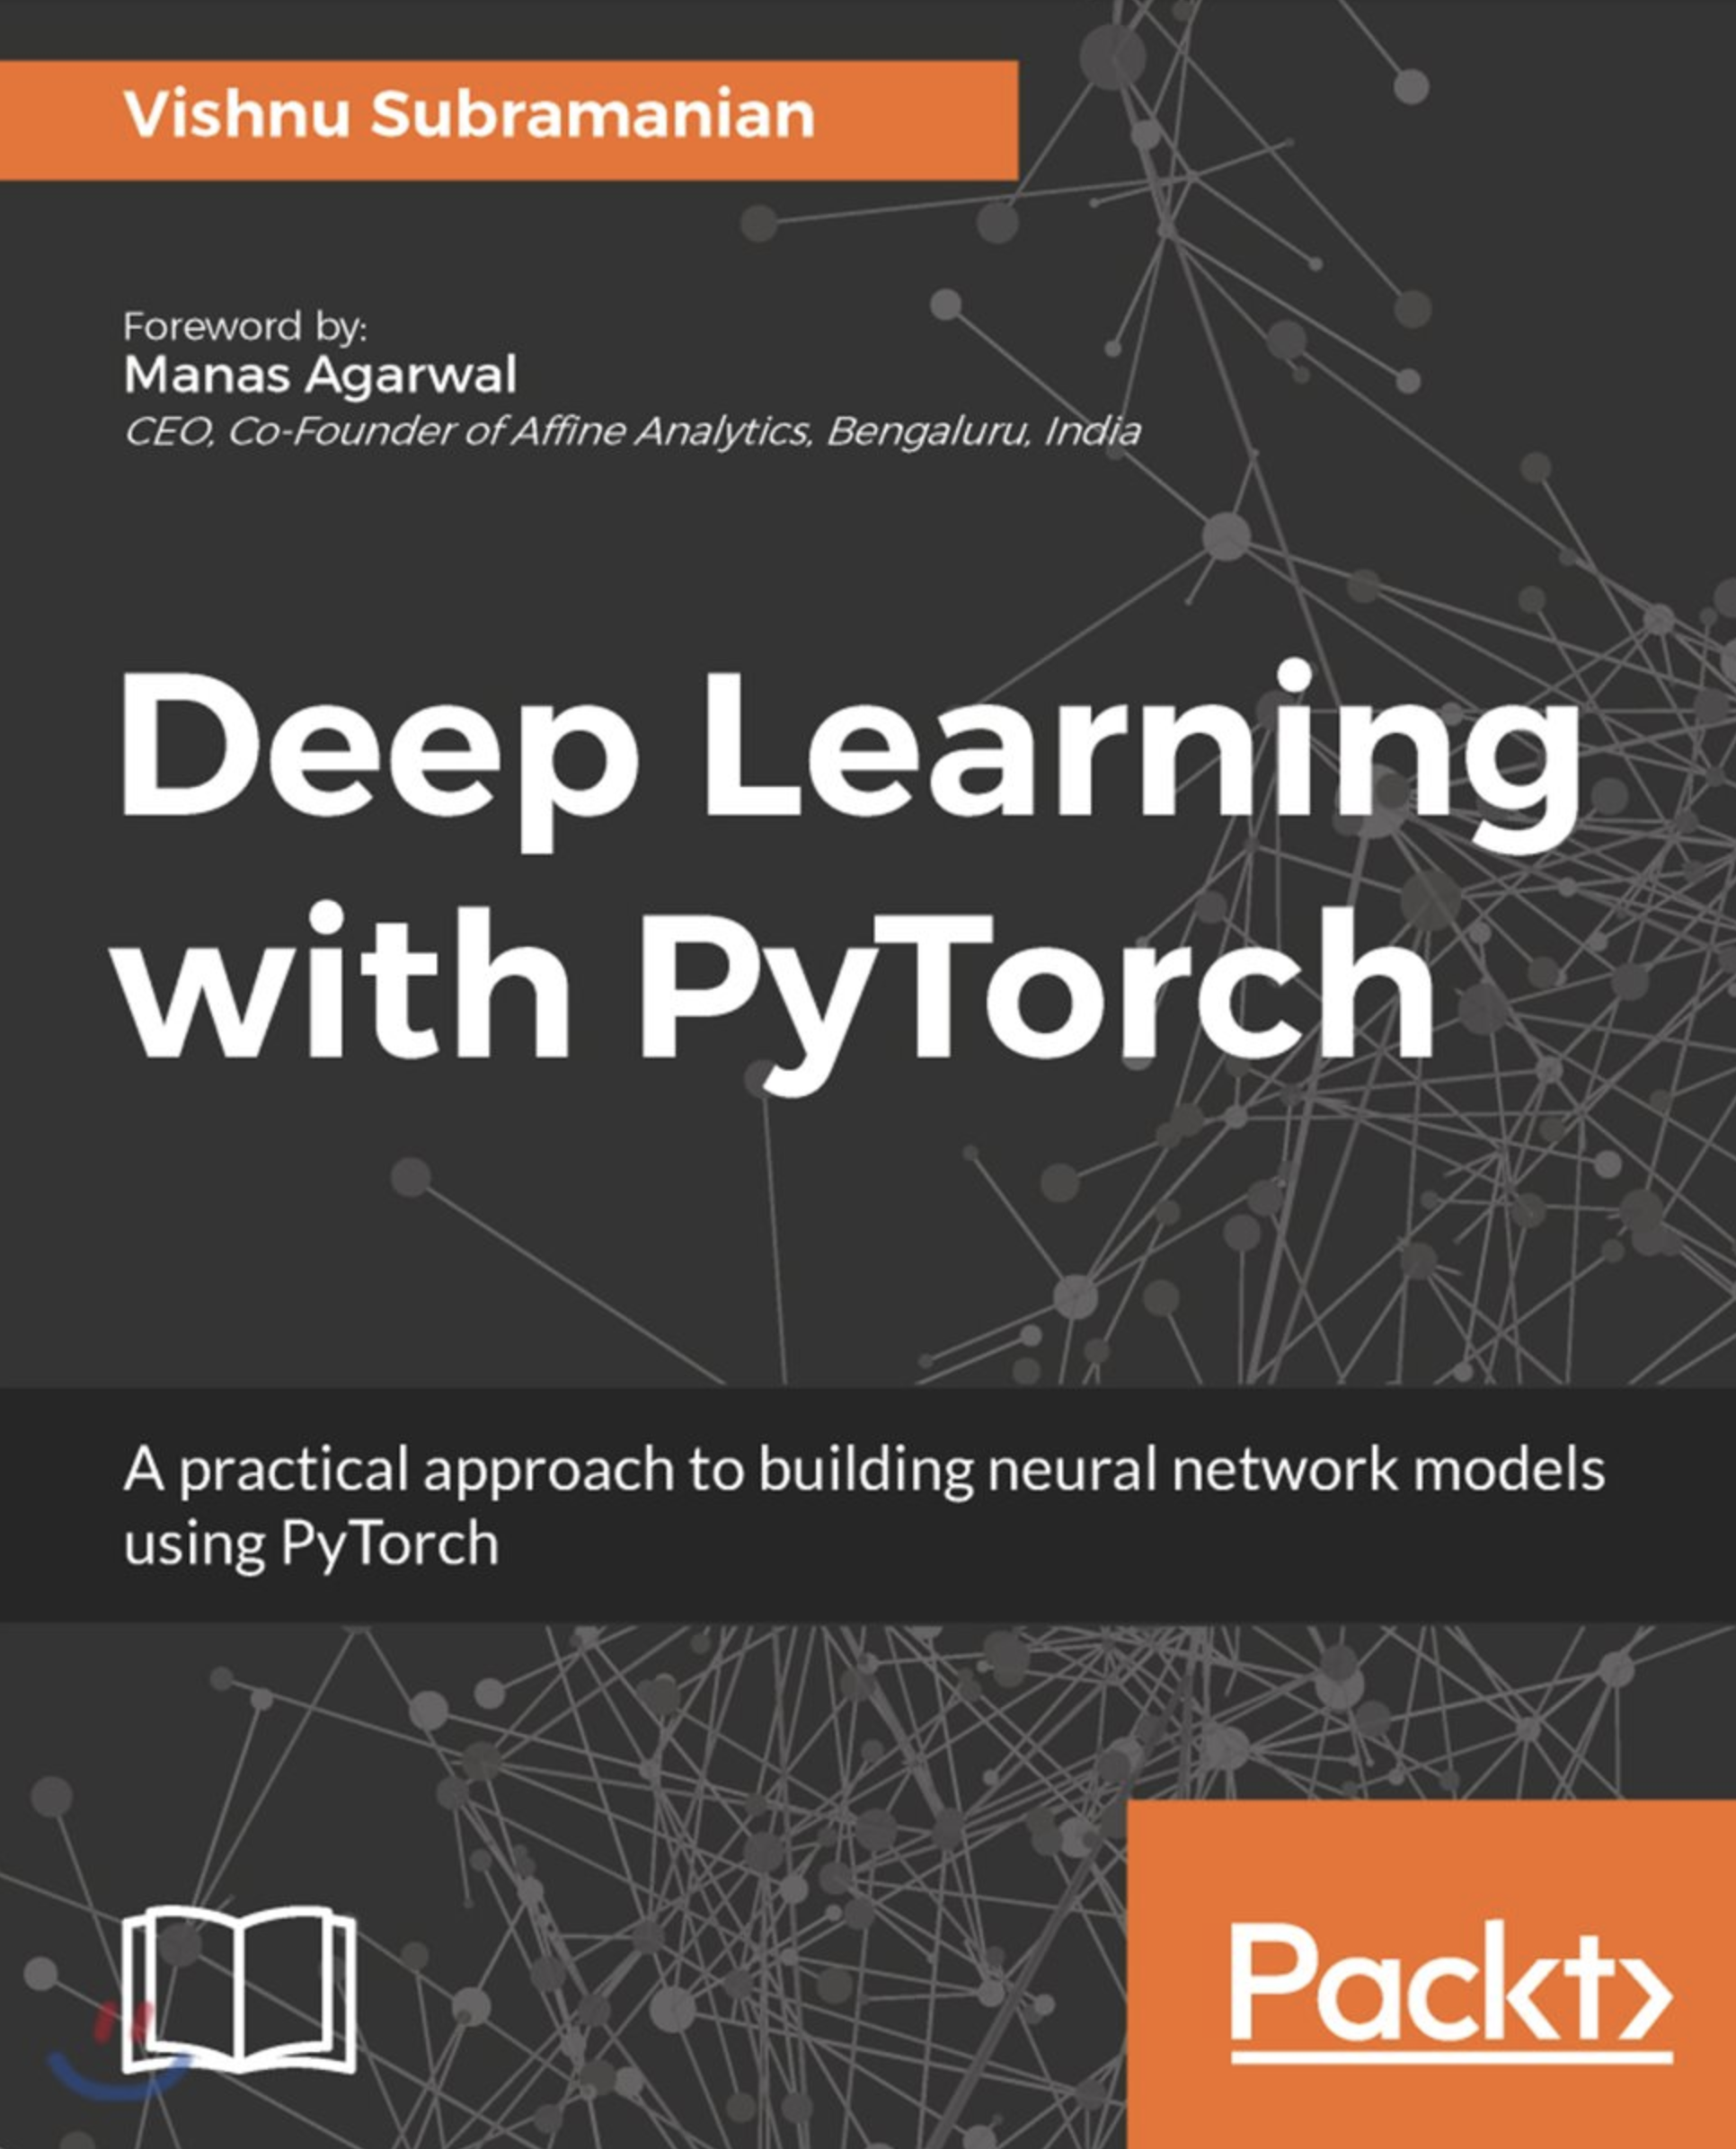

* 코드 및 내용 발췌: Deep Learning with PyTorch, https://rsgksb.tistory.com/4

#**PyTorch란?**
# Facebook의 인공지능 연구팀이 개발한 오픈소스 라이브러리이다. Python 언어를 사용하며, GPU 사용이 가능하기 때문에 속도가 상당히 빠르다. 딥러닝 네트워크를 구축하는데 일반적으로 사용되는 대표적인 플랫폼 중 하나이다.

#**오늘의 목표**


#1. 신경망 구축하기
#2. tensor, variable, gradient, optimizer 등 신경망 구축 관련 개념과 함수 살펴보기



#**개념 훑어보기**


# 1. 텐서(tensor): 단어나 이미지를 컴퓨터가 이해할 수 있도록 표현하는 데 사용된다.
# 2. 변수(variable): 텐서와 기울기값 정보 등을 감싸는 데(wrapping) 사용된다.
# 3. 손실(loss): 예측값과 실제값이 얼마나 차이나는지, 즉 모델이 얼마나 답을 잘못 맞췄는지를 나타낸다. 
# 4. 기울기(gradient): 손실값의 변화도를 나타내는 정보로, 최적화에 사용된다.
# 5. 최적화(optimization): 기울기값을 토대로, 손실값을 줄일 수 있는 방향으로 학습 파라미터(가중치, 바이어스)를 조정하는 과정이다.
# 6. 가중치(weight), 바이어스(bias): 신경망이 학습을 하는 대상이 되는 파라미터이다. 이 파라미터를 학습, 즉 조정하면서 최적의 모델을 구축해나간다.

#**인공 신경망 구축하기**


#1. 데이터 준비: 'get_data' 함수를 이용하여 input과 output 데이터를 포함한 tenser 만들기
#2. 학습가능한 파라미터 만들기: 'get_weights' 함수를 이용하여 문제를 해결하기 위해 최적화할 임의의 값들을 포함한 텐서 만들기
#3. 신경망 모델: 'simple_network' 함수를 이용하여 input 데이터에 대한 output 데이터를 산출하고, 선형규칙을 적용하고, input과 가중치를 곱하고, 이후 bias 값을 더하기 (*y=Wx+b*)
#4. 손실함수 만들기: 'loss_fn' 함수를 이용하여 모델이 얼마나 좋은지 평가하기
#5. 옵티마이저 만들기: 'optimizer' 함수를 이용하여 최초로 만들어진 임의의 가중치를 조정하여 목표치를 더 정확히 계산할 수 있도록 하기


In [ ]:
import torch
import numpy as np #NumPy는 행렬이나 일반적으로 대규모 다차원 배열을 쉽게 처리 할 수 있도록 지원하는 파이썬의 라이브러리
import matplotlib.pyplot as plt #시각화 패키지
%matplotlib inline

from torch.autograd import Variable #자동미분 패키지

tensor(787.7897)
tensor(9.5502)
tensor(7.2014)
tensor(5.6481)
tensor(4.6210)
tensor(3.9418)
tensor(3.4926)
tensor(3.1955)
tensor(2.9991)
tensor(2.8692)


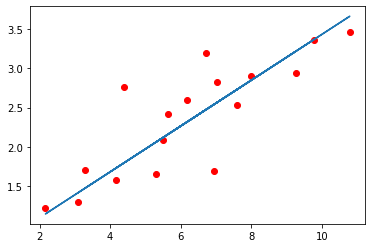

In [ ]:
def get_data(): #데이터 준비
    train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1]) #숫자로 된 배열 만들기
    train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3]) #숫자로 된 배열 만들기
    #y=Wx+b

    data_type = torch.FloatTensor #텐서 자료형: https://pytorch.org/docs/stable/tensors.html
    x = Variable(torch.from_numpy(train_X).type(data_type),requires_grad=False).view(17,1) # .view(): 텐서의 사이즈를 변경 #torch.from_numpy(): NumPy 배열을 텐서로 변환
    y = Variable(torch.from_numpy(train_Y).type(data_type),requires_grad=False)
    return x,y

def get_weights(): #학습 가능한 파라미터 만들기
    w = Variable(torch.randn(1),requires_grad=True) #'torch.randn(n): 정규분포된 난수로 구성된 n by n 텐서를 반환
    b = Variable(torch.randn(1),requires_grad=True) 
    return w,b
    #y=Wx+b

def simple_network(): #신경망 모델 구축하기
    y_pred = torch.matmul(x,w)+b #y=Wx+b
    return y_pred

def loss_fn(y,y_pred): #손실함수 만들기
    loss = (y_pred-y).pow(2).sum()
    for param in [w,b]:
        if not param.grad is None: param.grad.data.zero_() #이전의 기울기값을 제거함
    loss.backward() #손실값의 기울기값을 역전파함 
                    #.backward()호출시 requires_grad=TURE를 갖는 모든 tensor에 대해 
                    #손실의 변화도(즉, 기울기)를 자동으로 계산하여 .grad에 누적시킴
    return loss.data

learning_rate = 0.001

def optimize(learning_rate): #옵티마이저 만들기
    w.data -= learning_rate * w.grad.data
    b.data -= learning_rate * b.grad.data


def plot_variable(x,y,z='',**kwargs): #시각화 #참고: https://matplotlib.org/3.3.3/index.html
    l = []
    for a in [x,y]:
            l.append(a.data.numpy())
    plt.plot(l[0],l[1],z,**kwargs)

x,y = get_data()               # x: 입력값, y: 출력값(목표값)
w,b = get_weights()            # w,b: 학습 가능한 파라미터

#학습 시작하기

epochs = 500 #500번

for i in range(epochs):
    y_pred = simple_network() # 'wx + b'를 계산하는 함수
    loss = loss_fn(y,y_pred)   # 'y'와 'y_pred'의 오차제곱의 합을 계산
    if i % 50 == 0: #만약 '50'으로 나누어 떨어진 수가 '0'이라면, 'loss'를 출력
        print(loss)
    optimize(learning_rate)    # 손실을 최소화하도록 학습파라미터 'w, b'를 조정 (최적화)
    #y=Wx+b


plot_variable(x,y,'ro')
plot_variable(x,y_pred)
plt.show()

#**Tensor Introduction**
# 데이터 준비하기: Tensor는 단어나 이미지를 컴퓨터가 이해할 수 있도록 표현하는데 사용되며, Variable은 Pytorch tensor를 감싸는 데 (wrapping) 사용된다.

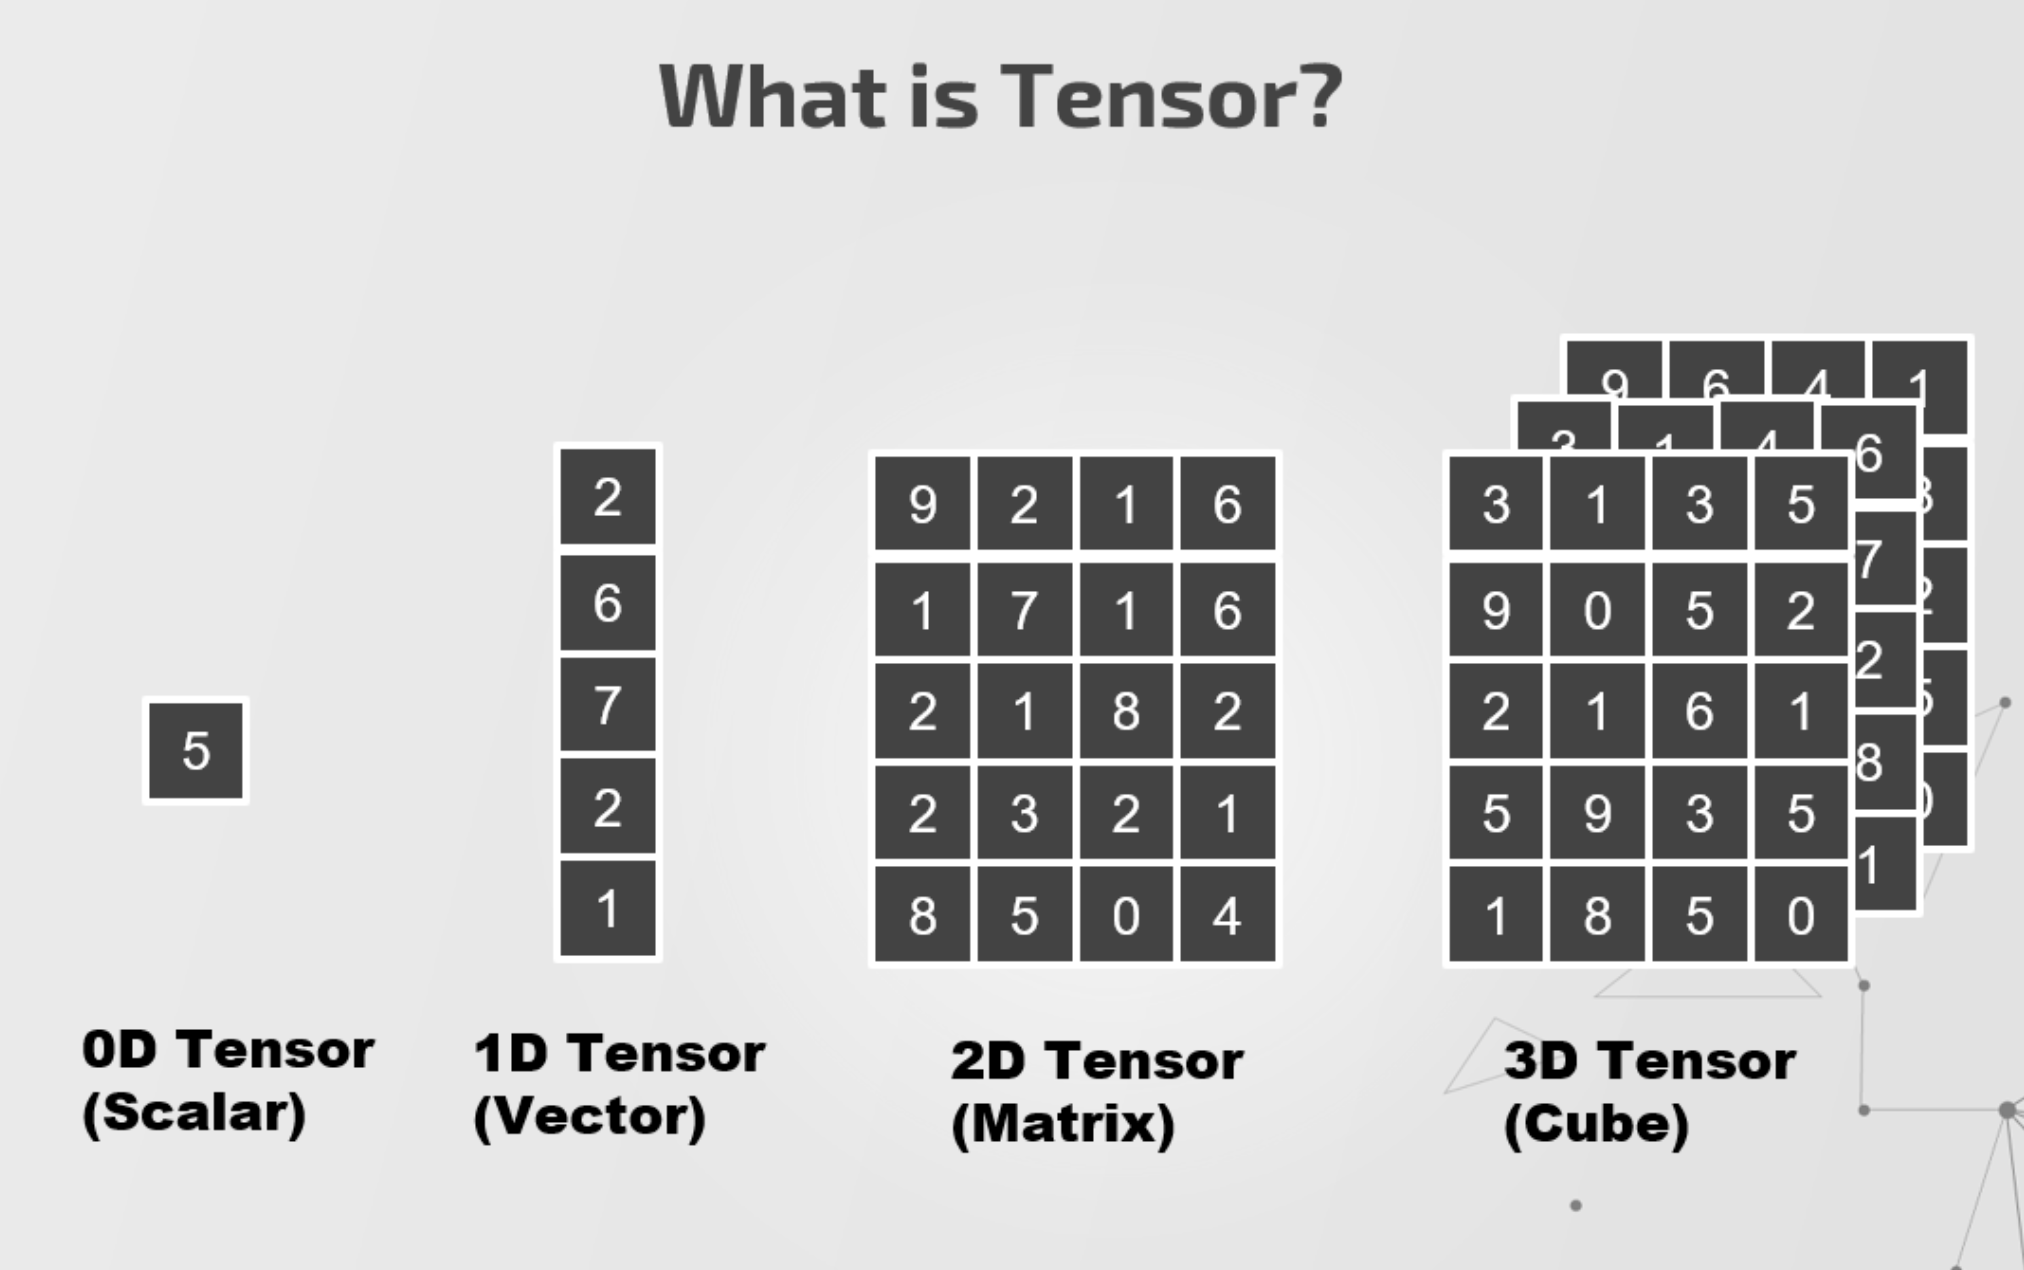

# **Vector** (1-D tensors)

In [ ]:
vector = torch.FloatTensor([23,24,24.5,26,27.2,23.0])

print(vector)

tensor([23.0000, 24.0000, 24.5000, 26.0000, 27.2000, 23.0000])


# **Matrix** (2-D tensors)

In [ ]:
from sklearn.datasets import load_boston
matrix = load_boston()
matrix_tensor = torch.from_numpy(matrix.data) # 'numpy' 데이터를'torch' tensor로 변환
matrix_tensor.size()

print(matrix_tensor)

tensor([[6.3200e-03, 1.8000e+01, 2.3100e+00,  ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00,  ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00,  ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01,  ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01,  ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01,  ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]], dtype=torch.float64)


In [ ]:
matrix_tensor[:2] #2행까지

tensor([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01, 6.5750e+00,
         6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02, 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01, 6.4210e+00,
         7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02, 1.7800e+01, 3.9690e+02,
         9.1400e+00]], dtype=torch.float64)

In [ ]:
matrix_tensor[:,:2] #2열까지

tensor([[6.3200e-03, 1.8000e+01],
        [2.7310e-02, 0.0000e+00],
        [2.7290e-02, 0.0000e+00],
        ...,
        [6.0760e-02, 0.0000e+00],
        [1.0959e-01, 0.0000e+00],
        [4.7410e-02, 0.0000e+00]], dtype=torch.float64)

In [ ]:
matrix_tensor[:10,:5] #10행 5열까지

tensor([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01],
        [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01],
        [6.9050e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01],
        [2.9850e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01],
        [8.8290e-02, 1.2500e+01, 7.8700e+00, 0.0000e+00, 5.2400e-01],
        [1.4455e-01, 1.2500e+01, 7.8700e+00, 0.0000e+00, 5.2400e-01],
        [2.1124e-01, 1.2500e+01, 7.8700e+00, 0.0000e+00, 5.2400e-01],
        [1.7004e-01, 1.2500e+01, 7.8700e+00, 0.0000e+00, 5.2400e-01]],
       dtype=torch.float64)

# **3-D tensors**

In [ ]:
from PIL import Image

panda = np.array(Image.open('panda.jpg').resize((224,224)))
panda_tensor = torch.from_numpy(panda)
panda_tensor.size()

torch.Size([224, 224, 3])

In [ ]:
plt.imshow(panda);

# **tensor 슬라이싱하기**

In [ ]:
data = torch.FloatTensor([1000.0,323.2,333.4,444.5,1000.0,323.2,333.4,444.5])

In [ ]:
print(data)

tensor([1000.0000,  323.2000,  333.4000,  444.5000, 1000.0000,  323.2000,
         333.4000,  444.5000])


In [ ]:
data[:5] #5개까지

tensor([1000.0000,  323.2000,  333.4000,  444.5000, 1000.0000])

In [ ]:
data[:-5] #뒤에서 5개를 제외

tensor([1000.0000,  323.2000,  333.4000])

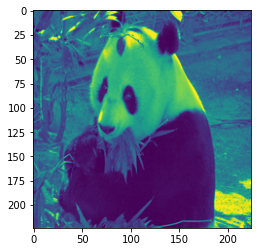

In [ ]:
plt.imshow(panda_tensor[:,:,0].numpy()); #0은 RGB의 첫번째 채널을 뜻함

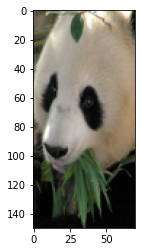

In [ ]:
plt.imshow(panda_tensor[25:175,60:130,:].numpy());

# **텐서 더하기 및 곱하기**

In [ ]:
#tensor 더하기
a = torch.rand(2,2) #2행 2열
b = torch.rand(2,2)
c = a + b
d = torch.add(a,b)

In [ ]:
a

tensor([[0.0364, 0.2199],
        [0.9887, 0.5573]])

In [ ]:
b

tensor([[0.5138, 0.3569],
        [0.7382, 0.9674]])

In [ ]:
a+b
# c
# d

tensor([[0.5502, 0.5768],
        [1.7268, 1.5247]])

In [ ]:
d.add_(5) #각 요소에 5를 더하기

tensor([[5.5502, 5.5768],
        [6.7268, 6.5247]])

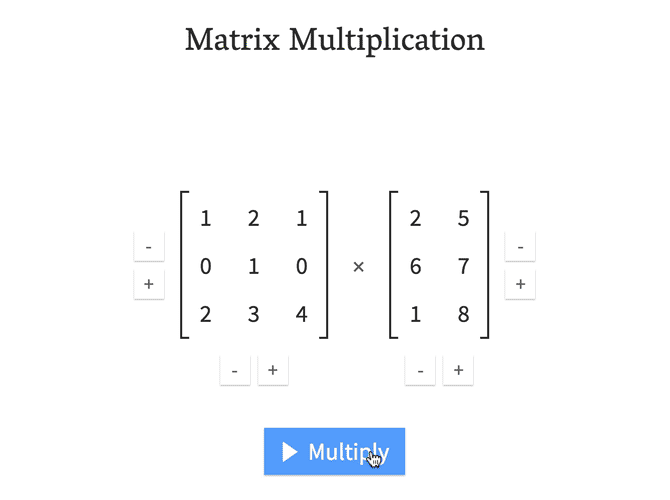

(https://laptrinhx.com/matrix-multiplication-part2-lesson8-1858255169/)

In [ ]:
a = torch.rand(2,2) 
b = torch.rand(2,3)

In [ ]:
a

tensor([[0.2733, 0.7434],
        [0.4999, 0.6757]])

In [ ]:
b

tensor([[0.4667, 0.9132, 0.3522],
        [0.6184, 0.3797, 0.8012]])

In [ ]:
#행렬곱
torch.matmul(a,b)

tensor([[0.5872, 0.5318, 0.6919],
        [0.6511, 0.7130, 0.7175]])

In [ ]:
b[:,:2] #열을 2번째까지만 표시하기

tensor([[0.4667, 0.9132],
        [0.6184, 0.3797]])

In [ ]:
torch.matmul(a,b[:,:2])

tensor([[0.5872, 0.5318],
        [0.6511, 0.7130]])

In [ ]:
c = torch.rand(3,2)
c

tensor([[0.6534, 0.8087],
        [0.7004, 0.8269],
        [0.5794, 0.7432]])

In [ ]:
torch.mm(a,c)

RuntimeError: ignored

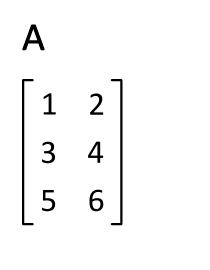

(https://en.wikipedia.org/wiki/Transpose)

In [ ]:
c.T # 2x3 행렬이 됨
c

tensor([[0.6534, 0.8087],
        [0.7004, 0.8269],
        [0.5794, 0.7432]])

In [ ]:
torch.matmul(a,c.T)

tensor([[0.7797, 0.8061, 0.7108],
        [0.8730, 0.9088, 0.7918]])

#**변수(variable)**
스크린샷 2021-01-31 오후 8.55.31.png

#1. data: 텐서
#2. grad: 미분값(기울기)
#3. grad_fn: 텐서를 연산한 함수에 대한 정보




#**기울기(gradient)**
#1. 기울기는 가중치(W)와 바이어스(b)에 대한 손실의 변화율을 나타낸다.


# [**왜 기울기(gradient)가 필요할까?**](https://drive.google.com/uc?export=view&id=1YQESZlpxK-b3yjAeVDMeJQnHOcpvoOil)

출처: https://www.youtube.com/watch?v=IHZwWFHWa-w

# **왜 bias가 필요할까?**
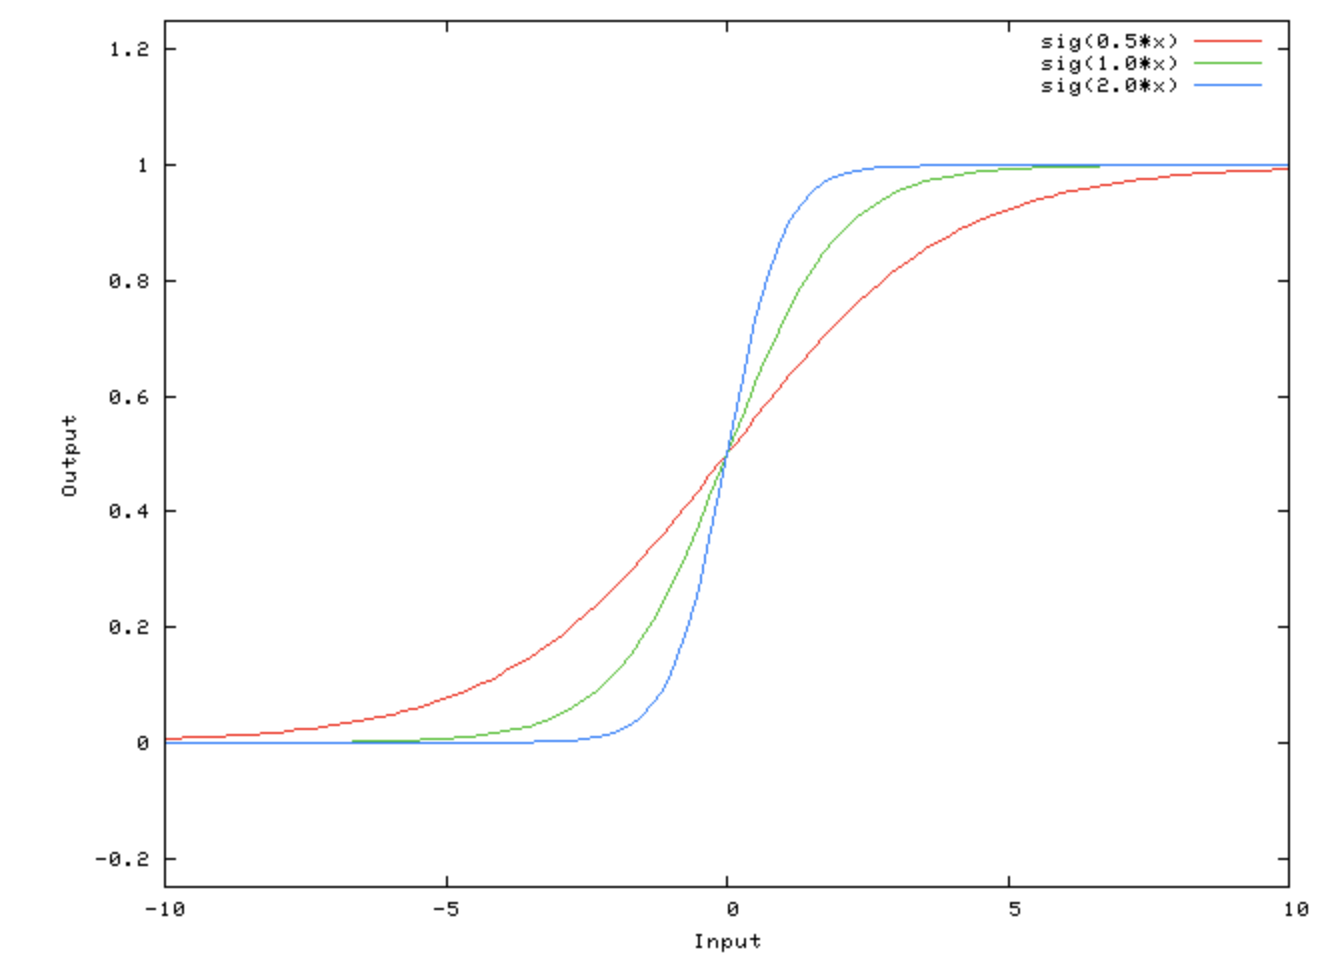
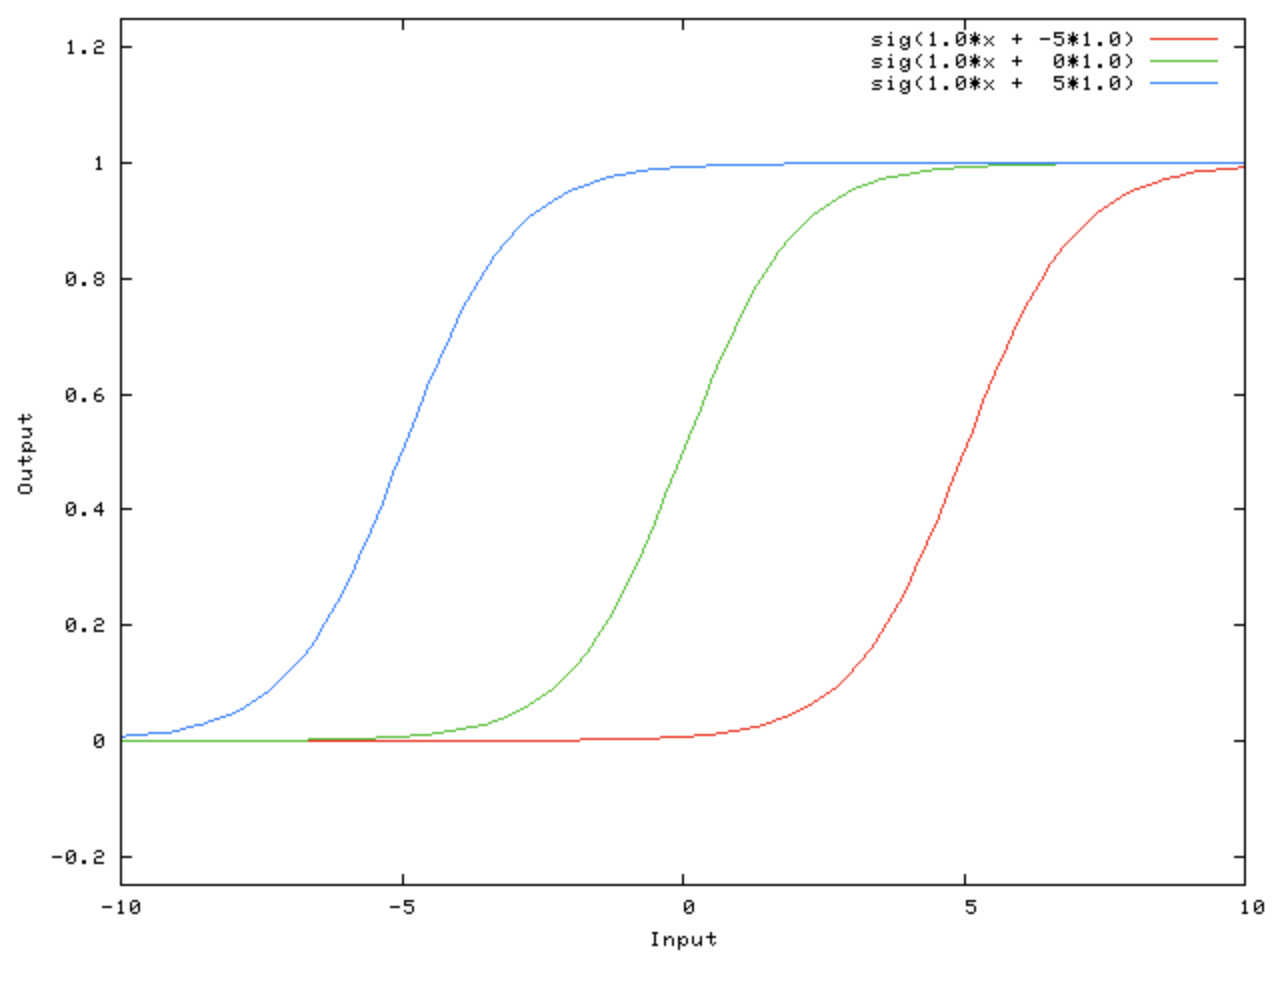


출처: https://chanhyeonglee.tistory.com/5

#**신경망을 위한 데이터 만들기**

In [ ]:
def get_data(): #데이터 준비
    train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1]) #숫자로 된 배열 만들기
    train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3]) #숫자로 된 배열 만들기
    data_type = torch.FloatTensor #텐서 자료형: https://pytorch.org/docs/stable/tensors.html
    x = Variable(torch.from_numpy(train_X).type(data_type),requires_grad=False).view(17,1) #.view(): 텐서의 사이즈 변경 #torch.from_numpy(): NumPy 배열을 텐서로 변환
    y = Variable(torch.from_numpy(train_Y).type(data_type),requires_grad=False)
    return x,y

print(x)
print(y)

tensor([[ 3.3000],
        [ 4.4000],
        [ 5.5000],
        [ 6.7100],
        [ 6.9300],
        [ 4.1680],
        [ 9.7790],
        [ 6.1820],
        [ 7.5900],
        [ 2.1670],
        [ 7.0420],
        [10.7910],
        [ 5.3130],
        [ 7.9970],
        [ 5.6540],
        [ 9.2700],
        [ 3.1000]])
tensor([1.7000, 2.7600, 2.0900, 3.1900, 1.6940, 1.5730, 3.3660, 2.5960, 2.5300,
        1.2210, 2.8270, 3.4650, 1.6500, 2.9040, 2.4200, 2.9400, 1.3000])


#**학습 가능한 파라미터 만들기**
#1. 학습 가능한 파라미터: *w*, *b*
#2. 고정 파라미터: *x*, *y*
#3. 학습 가능한 파라미터인 *w*와 *b*는 최초에 임의의 숫자로 만들어지고, 이후 *x*에 대한 *y*값을 맞추기 위한 최적해를 학습한다. 이 때, 기울기값을 이용해야 해야하기 때문에 'require_grad'값이 'True'이다.
#4. y = Wx + b

In [ ]:
from torch.autograd import Variable #자동미분 패키지

def get_weights():
    w = Variable(torch.randn(1),requires_grad = True) #'torch.randn(n): 정규분포된 난수로 구성된 n by n 텐서를 반환
    b = Variable(torch.randn(1),requires_grad = True)
    return w,b

print(w)
print(b)

tensor([0.2533], requires_grad=True)
tensor([[0.4667, 0.9132, 0.3522],
        [0.6184, 0.3797, 0.8012]])


[Autograd documentation](https://tutorials.pytorch.kr/beginner/blitz/autograd_tutorial.html)

# **신경망 모델**
# 1. 모델의 input(x)과 output(y)을 정의하였으면, input(x)을 ouput(y)에 대응시키는 방법을 학습하는 모델을 만들도록 한다.
# 2. 선형 관계 (linear relationship)을 전제로 하는 간단한 신경망을 만들어보자.
# 3. 선형 관계는 *y = wx + b*와 같이 만들어지며, 이 때 *w*와 *b*가 학습가능한 파라미터이다.
# 4. 신경망은 *w*와 *b*값을 학습하여 *wx + b*가 실제 *y*값에 도달하도록 하는 것을 목표로 한다. 트레이닝 데이터를 시각화하면 다음과 같다.

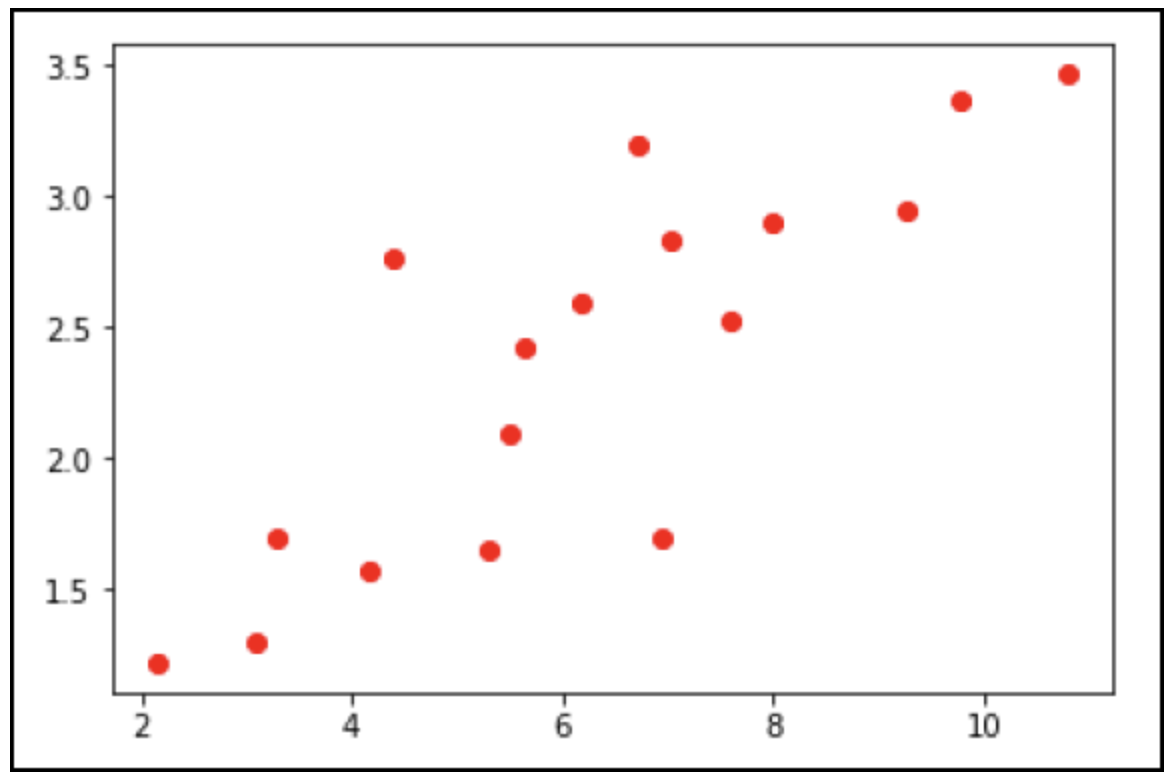

# 다음은 input 데이터에 맞추어진 선형모델이다.

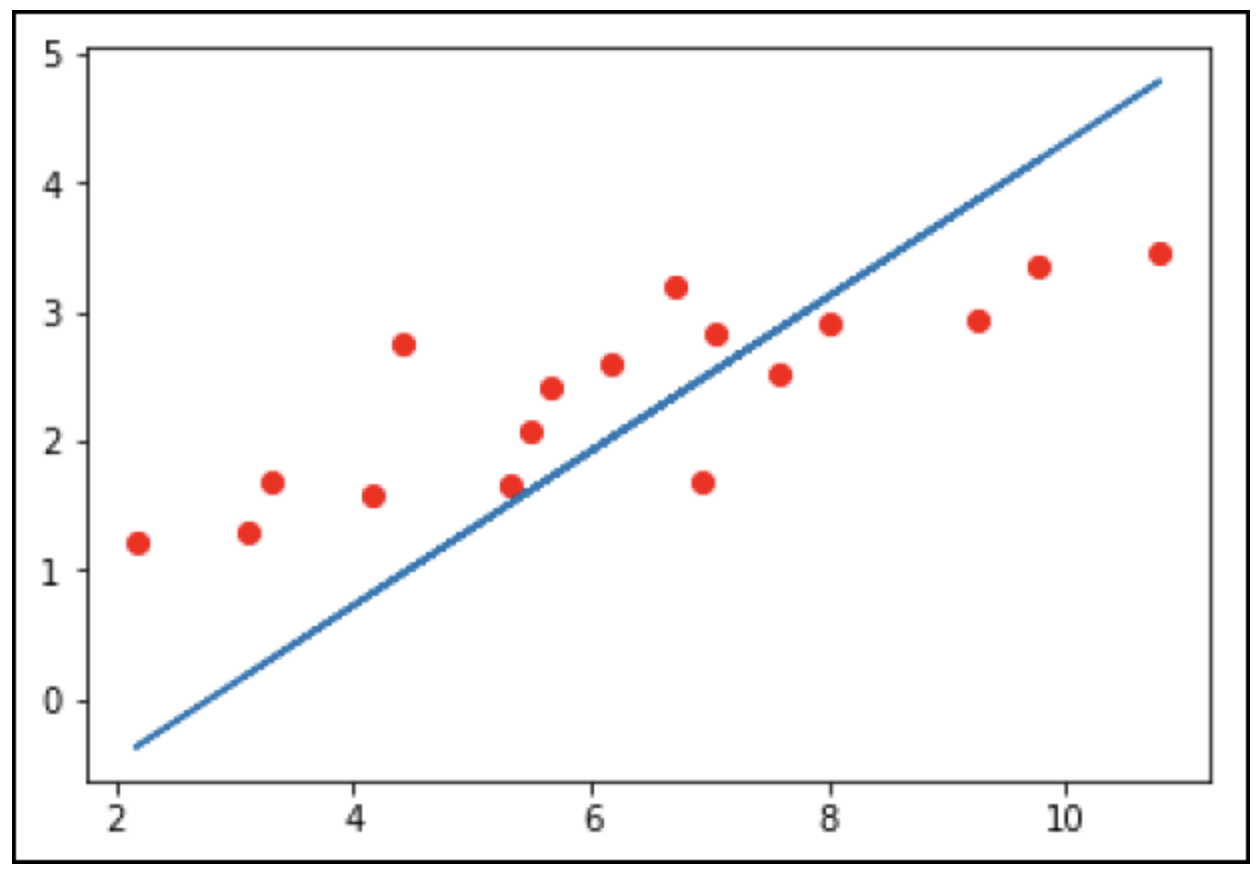
# 파란색 선은 신경망 모델이 학습한 것을 나타낸다.

#**신경망 실행하기**
#* 모든 파라미터 (*x*, *w*, *b*, *y*)를 만들었으니 이제 다음과 같이 신경망을 실행할 차례이다. 

#    1) *w*와 *x* 간의 **행렬곱**

#    2) *b* 더하기

#    3) *y*값 출력

#y = Wx + b

In [ ]:
def simple_network():
    y_pred = torch.matmul(x,w)+b
    return y_pred

print(y_pred)

tensor([1.5450, 1.8462, 2.1475, 2.4788, 2.5391, 1.7827, 3.3193, 2.3342, 2.7198,
        1.2347, 2.5698, 3.5964, 2.0963, 2.8313, 2.1897, 3.1799, 1.4902],
       grad_fn=<AddBackward0>)


#이제 *y*값을 출력하였으니 모델의 성능을 판단하기 위하여 손실함수를 이용할 차례이다.

#**손실 함수**
#1. 학습 파라미터(*w*, *b*)가 임의의 값으로 시작하였기 때문에 처음부터 *y_pred*값이 *y*값에 도달하는 것은 매우 어렵다.
#2. 따라서 *y_pred*값이 얼마나 *y*에 근접하는지를 알려주는 손실함수를 만들도록 한다. 회귀 문제에 해당하기 때문에 **sum of squared error (SSE)**을 사용하도록 한다.
#3. SSE는 예측값이 실제값에 얼마나 가까운지를 모델이 알 수 있도록 하는데 유용하다.

In [ ]:
def loss_fn(y,y_pred):
    loss = (y_pred-y).pow(2).sum()
    for param in [w,b]:
        if not param.grad is None: param.grad.data.zero_() #이전의 기울기값을 삭제함
    loss.backward() # 손실값에 대한 기울기값을 역전파함 #.backward()호출시 기울기를 자동으로 계산하여 .grad에 누적됨
    return loss.data

#**오차 역전파 (Error back propagation)**

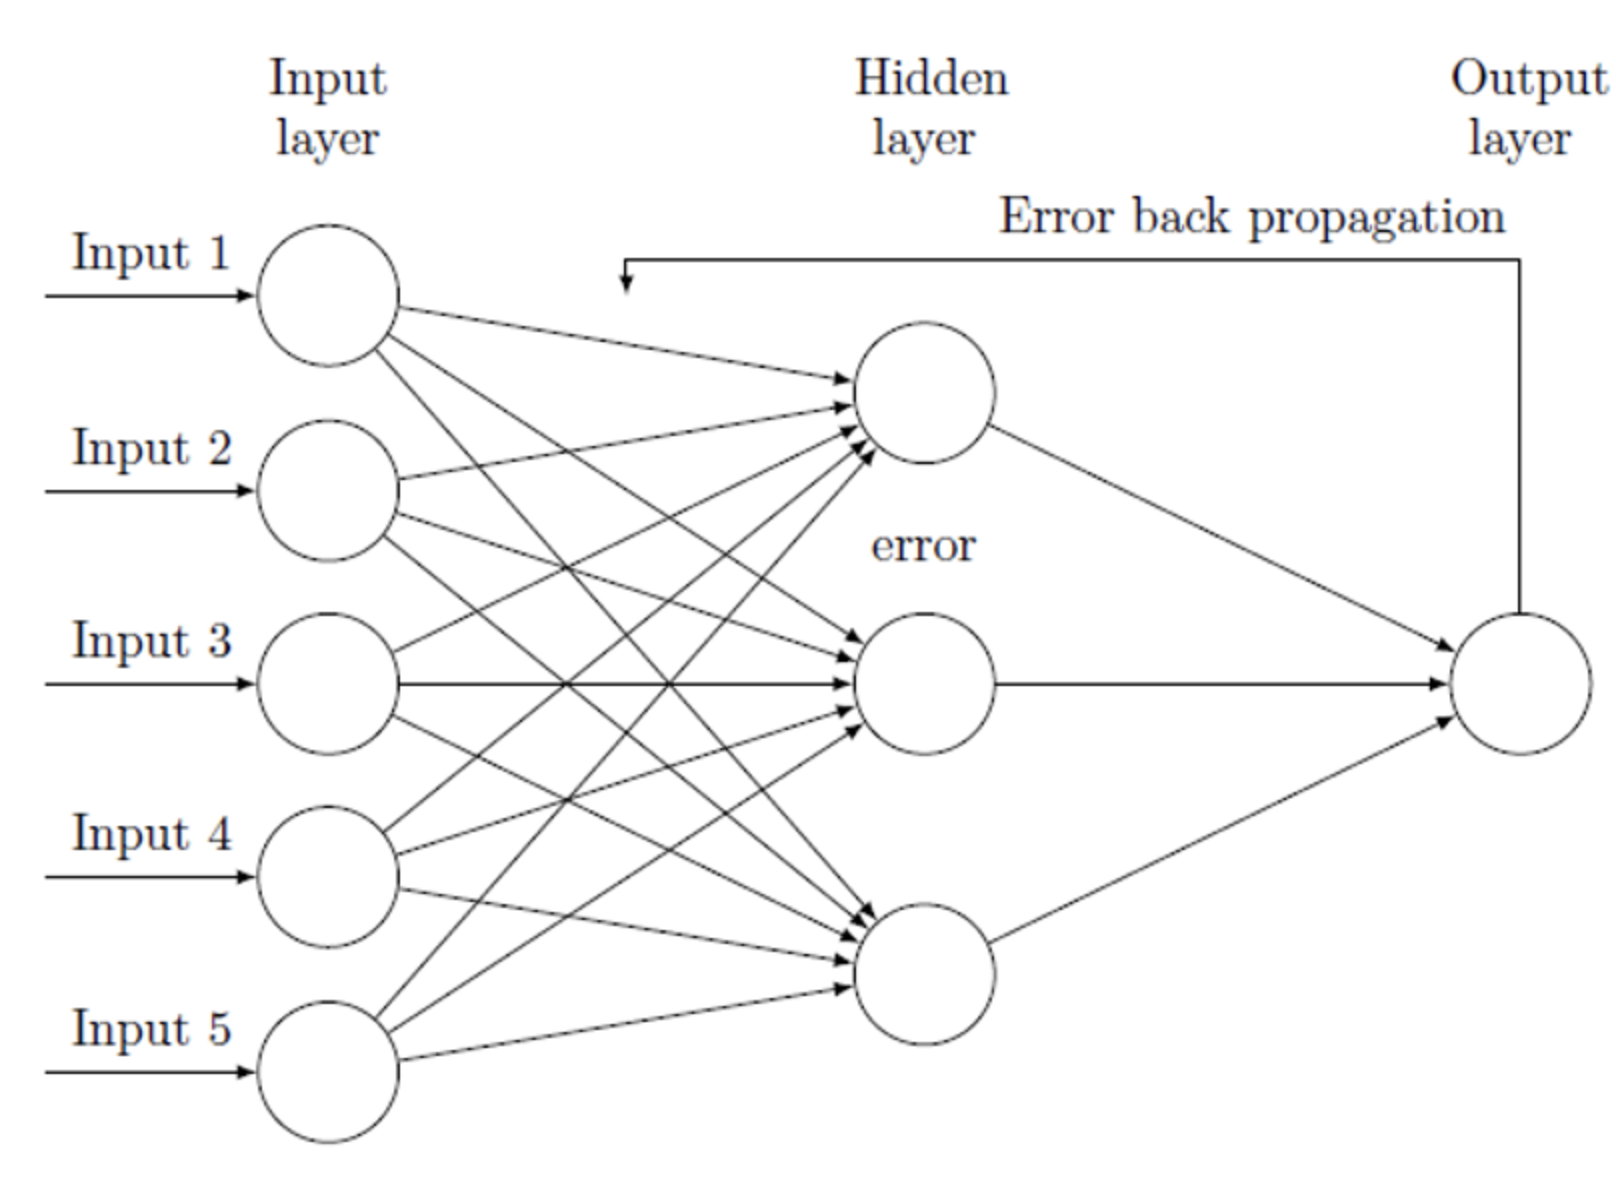

(https://larrylisky.com/2018/05/28/five-minute-introduction-to-deep-neural-network/)

#**신경망 최적화하기**
# 손실값이 계산되면 이후 그 값을 기울기값으로 최적화하여 손실값을 줄여나간다

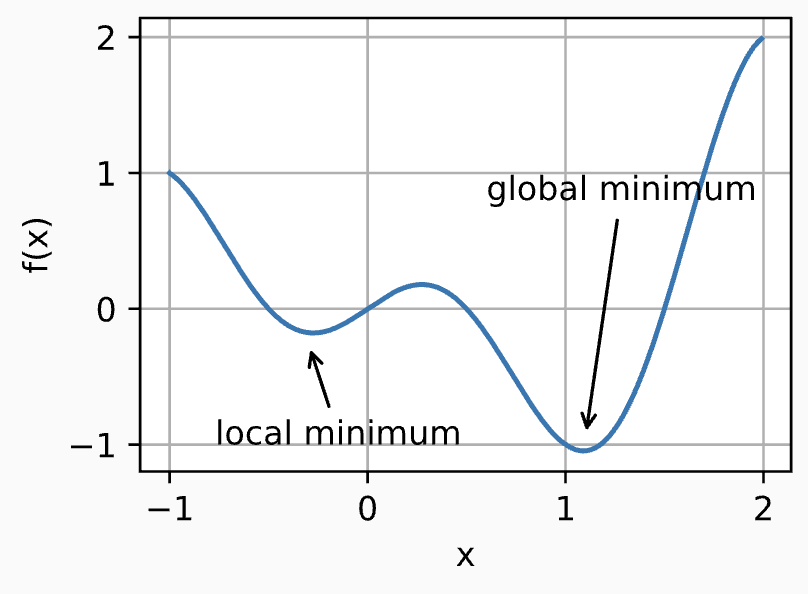
(https://d2l.ai/chapter_optimization/optimization-intro.html)


In [ ]:
learning_rate = 0.001 #구동 환경에 따라 적절히 선택, Adam의 경우 0.001

def optimize(learning_rate):
    w.data -= learning_rate * w.grad.data
    b.data -= learning_rate * b.grad.data

# Different optimizers, such as Adam, RmsProp, and SGD are already implemented for use in the torch.optim package.

#**학습률(learning rate)**

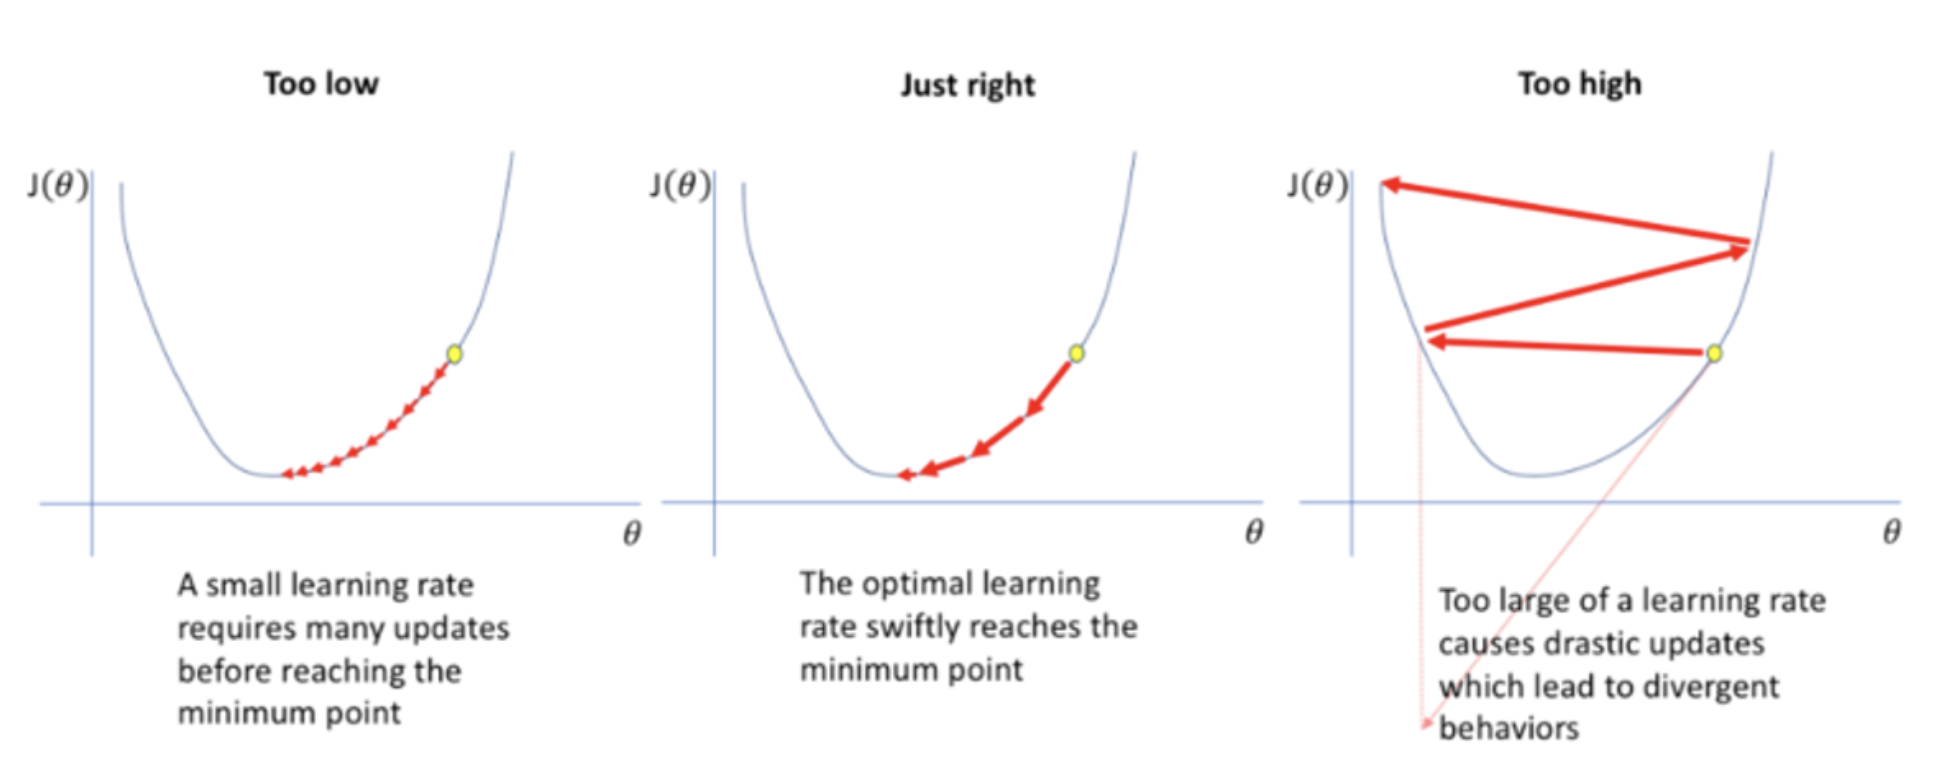

(https://www.jeremyjordan.me/nn-learning-rate/)

# **Case Study: Nativelikeness Detection**

# **학습, 평가 등 정의하기**

In [ ]:
import torch
import torch.nn.functional as F 

def train(model, train_loader, loss_func, optimizer, step, print_step=200):
    """train function"""
    model.train()
    for i, batch in enumerate(train_loader):
        inputs, targets = batch.text, batch.label.float()
        # 경사 초기화
        optimizer.zero_grad()
        # 순방향 전파
        outputs = model(inputs)
        # 손실값 계산
        loss = loss_func(outputs, targets)
        # 역방향 전파
        loss.backward()
        # 매개변수 업데이트
        optimizer.step()
    
        if i % print_step == 0:
            print('Train Step: {} ({:05.2f}%)  \tLoss: {:.4f}'.format(
                    step, 100.*(i*train_loader.batch_size)/len(train_loader.dataset), 
                    loss.item()))

def test(model, test_loader, loss_func):
    """test function"""
    # 모델에게 평가단계이라고 선언함
    model.eval()
    test_loss = 0
    correct = 0

    with torch.no_grad():
        for batch in test_loader:
            inputs, targets = batch.text, batch.label.float()
            # 순방향전파
            outputs = model(inputs)
            # 손실값 계산(합)
            test_loss += loss_func(outputs, targets, reduction="sum").item()
            # 예측값
            preds = torch.sigmoid(outputs).ge(0.5).float()
            # 정확하게 예측한 개수를 기록한다
            correct += preds.eq(targets).sum().item()
            
    test_loss /= len(test_loader.dataset)
    test_acc = correct / len(test_loader.dataset)
    print('Test set: Average loss: {:.4f}, Accuracy: {}/{} ({:05.2f}%)'.format(
        test_loss, correct, len(test_loader.dataset), 100. * test_acc))
    return test_loss, test_acc

def main(model, train_loader, test_loader, loss_func, optimizer, n_step, 
         save_path=None, print_step=30):
    """메인 학습 함수"""
    test_accs = []
    best_acc = 0.0

    for step in range(1, n_step+1):
        # 훈련 단계
        train(model, train_loader, loss_func, optimizer, 
              step=step, print_step=print_step)
        # 평가 단계
        test_loss, test_acc = test(model, test_loader, 
                                   loss_func=F.binary_cross_entropy_with_logits)
        # 테스트 정확도 기록
        test_accs.append(test_acc)
        # 모델 최적의 매개변수값을 저장할지 결정하고 기록한다.
        if len(test_accs) >= 2:
            if test_acc >= best_acc:
                best_acc = test_acc
                best_state_dict = model.state_dict()
                print("discard previous state, best model state saved!")
        print("")

    # 매개변수 값 저장하기
    if save_path is not None:
      if len(test_accs) == 1:
        best_state_dict = model.state_dict()
      torch.save(best_state_dict, save_path)



In [ ]:
pip install nltk==3.4.1

# **패키지 로딩, 데이터 전처리**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

from torchtext.data import Field, TabularDataset, Iterator


# 토큰화 함수로 NLTK 사용
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
s = "he thinked a pleasant day today."
text1=nltk.word_tokenize("he thinked a pleasant day today.")
print(nltk.pos_tag(text1))

def tokenizer(doc):
    #return ['/'.join(t) for t in nltk.pos_tag(nltk.word_tokenize(doc))]
    result = nltk.word_tokenize(doc)
    #result = nltk.pos_tag(result)
    return result

# 필드 정의
TEXT = Field(sequential=True,
             use_vocab=True,
             tokenize=tokenizer,
             lower=True, 
             batch_first=True)  
LABEL = Field(sequential=False,  
              use_vocab=False,   
              preprocessing = lambda x: int(x),
              batch_first=True, 
              is_target=True)

# 각 문장에 해당하는 id, 사용하지 않지만 기본필드로 정의 해준다.
ID = Field(sequential=False,  
           use_vocab=False,   
           is_target=False)

# TabularDataset.splits 함수를 사용해 훈련 세트와 테스트 세트를 나눈다.
train_data, test_data = TabularDataset.splits(
    path='', format='tsv', 
    train="training.txt",
    test="validation.txt",
    fields=[('id', ID), ('text', TEXT), ('label', LABEL)],
    skip_header=True)

# 단어리스트 생성
TEXT.build_vocab(train_data, min_freq=10)

# 데이터 개수 및 단어리스트 크기 확인
print("Train Data: {} / Test Data: {}".format(len(train_data), len(test_data)))
print("Vocab Size: {}".format(len(TEXT.vocab)))

# 환경 변수 설정
BATCH = 32  # 미니배치크기
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'  # 디바이스
STEP = 10  # 총 반복스텝

# 데이터 로더 정의
train_loader = Iterator(dataset=train_data, batch_size=BATCH, device=DEVICE)
test_loader = Iterator(dataset=test_data, batch_size=BATCH, device=DEVICE)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('he', 'PRP'), ('thinked', 'VBD'), ('a', 'DT'), ('pleasant', 'JJ'), ('day', 'NN'), ('today', 'NN'), ('.', '.')]
Train Data: 8909 / Test Data: 862
Vocab Size: 1516


# **원어민성 탐지 모델**

In [ ]:
class SentimentCls(nn.Module):
    def __init__(self, vocab_size, embed_size, hidden_size, output_size,
                 num_layers=3, batch_first=True, bidirec=True):
        super(SentimentCls, self).__init__()
        self.hidden_size = hidden_size
        self.n_layers = num_layers
        self.n_direct = 2 if bidirec else 1
        self.embedding_layer = nn.Embedding(vocab_size, embed_size)
        self.rnn_layer = nn.RNN(input_size=embed_size,
                               hidden_size=hidden_size,
                                num_layers=num_layers,
                                batch_first=batch_first,
                                bidirectional=bidirec)

        self.linear = nn.Linear(self.n_direct*hidden_size, output_size)



    def forward(self, x):
        embeded = self.embedding_layer(x)
        hidden, cell = self.init_hiddens(x.size(0), self.hidden_size, device=x.device)
        output, hidden = self.rnn_layer(embeded, hidden)
        last_hidden = torch.cat([h for h in hidden[-self.n_direct:]], dim=1)
        scores = self.linear(last_hidden)
        return scores.view(-1)
    
    def init_hiddens(self, batch_size, hidden_size, device):
        hidden = torch.zeros(self.n_direct*self.n_layers, batch_size, hidden_size)
        cell = torch.zeros(self.n_direct*self.n_layers, batch_size, hidden_size)
        return hidden.to(device), cell.to(device)

# **모델, 손실함수 및 옵티마이저 선언**

In [ ]:
# 모델 선언에 필요한 인자 설정
vocab_size = len(TEXT.vocab)  # V: 단어장 크기
embed_size = 128  # E: 임베딩 크기
hidden_size = 256  # D: 은닉층 크기
output_size = 1  # 출력층 크기
num_layers = 3  # RNN 층의 개수
batch_first = True  # RNN 입력의 첫번째 차원이 미니배치 크기인 경우 활성화
bidirec = True  # 양방향 순환 신경망 사용 여부

# 모델 선언
model = SentimentCls(vocab_size, embed_size, hidden_size, output_size,
                     num_layers, batch_first, bidirec).to(DEVICE)

# 손실함수와 옵티마이저 선언
loss_function = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters())

# **학습**

In [ ]:
main(model=model,
     train_loader=train_loader,
     test_loader=test_loader,
     loss_func=loss_function, 
     optimizer=optimizer, 
     n_step=STEP,
     print_step=256)

Train Step: 1 (00.00%)  	Loss: 0.6983
Train Step: 1 (91.95%)  	Loss: 0.6100
Test set: Average loss: 0.4576, Accuracy: 682/862 (79.12%)

Train Step: 2 (00.00%)  	Loss: 0.2570
Train Step: 2 (91.95%)  	Loss: 0.3570
Test set: Average loss: 0.4708, Accuracy: 677/862 (78.54%)
discard previous state, best model state saved!

Train Step: 3 (00.00%)  	Loss: 0.4288
Train Step: 3 (91.95%)  	Loss: 0.3456
Test set: Average loss: 0.6055, Accuracy: 629/862 (72.97%)

Train Step: 4 (00.00%)  	Loss: 0.5062
Train Step: 4 (91.95%)  	Loss: 0.3207
Test set: Average loss: 0.3703, Accuracy: 722/862 (83.76%)
discard previous state, best model state saved!

Train Step: 5 (00.00%)  	Loss: 0.2145
Train Step: 5 (91.95%)  	Loss: 0.2786
Test set: Average loss: 0.3554, Accuracy: 731/862 (84.80%)
discard previous state, best model state saved!

Train Step: 6 (00.00%)  	Loss: 0.3027
Train Step: 6 (91.95%)  	Loss: 0.2889
Test set: Average loss: 0.3727, Accuracy: 724/862 (83.99%)

Train Step: 7 (00.00%)  	Loss: 0.2492
Tr

# **예문 테스트**

In [ ]:
def test_input(sentence, model, field, tokenizer, device):
    tokenized_sentence = tokenizer(sentence)
    x = field.process([tokenized_sentence]).to(device)
    output = model(x)
    pred = torch.sigmoid(output).item()
    print(pred)

In [ ]:
native_sample = "I respect you as you explain the hard concept and functions well." #excerpted from the English Gigaword
learner_sample = " Colorless green ideas sleep furiously." #excerpted from INU-MULC

In [ ]:
print("Native Sample")
test_input(native_sample, model, field=TEXT, tokenizer=tokenizer, device=DEVICE)
print("Learner Sample")
test_input(learner_sample, model, field=TEXT, tokenizer=tokenizer, device=DEVICE)

Native Sample
0.9991549253463745
Learner Sample
0.9988951086997986
